**Load libraries**

In [7]:
import os, sys
from os.path import join, dirname, basename, exists, isdir
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from asra.core import asra_ordering, asra_orderings_multiblock
from asra.utils import rank_corner_coords, all_genotypes, compute_block_weights_from_Q, build_additive_model, additive_predict
from asra.plotting import plot_q_values


# Background
Implementing and testing ASRA from DOI: 10.1002/chem.201103811.

# Load data

In [2]:
df = pd.read_csv('test/test_data/asra_data.tsv', sep='\t', skiprows=0)

X = []
y = []
sigma = []
for aa1, aa2, e, s in zip(df['idxat215'], df['idxat217'], df['eAverage'], df['eStd.']):
    X.append([aa1, aa2])
    y.append(e)
    sigma.append(s)


X = np.asarray(X)
y = np.asarray(y)
sigma = np.asarray(sigma)

display(X.shape)
display(y.shape)
display(sigma.shape)

(95, 2)

(95,)

(95,)

## Set up encoders and decoders

In [3]:
aa = ['A', 'C', 'D', 'E',
 'F', 'G', 'H', 'I',
 'K', 'L', 'M', 'N',
 'P', 'Q', 'R', 'S',
 'T', 'V', 'W', 'Y']
idx = list(range(0, 20))

encoder = {k:v for k,v in zip(aa, idx)}
decoder = {k:v for k,v in zip(idx, aa)}


In [4]:
ordering, Q = asra_ordering(X, y, levels=20, sigma=sigma, w=0.0)
for item in ordering:
    print([decoder[i] for i in item])
print(Q)

['K', 'Q']
['R', 'R']
['W', 'E']
['D', 'S']
['E', 'K']
['P', 'A']
['G', 'W']
['V', 'P']
['A', 'Y']
['H', 'H']
['I', 'T']
['C', 'G']
['Q', 'I']
['L', 'C']
['T', 'F']
['Y', 'M']
['N', 'V']
['M', 'D']
['S', 'N']
['F', 'L']
[[ -4.44375     -7.34736842]
 [  3.18888889   2.68947368]
 [-13.85         9.61875   ]
 [-13.01176471 -11.14444444]
 [ 36.34285714   4.84375   ]
 [-10.08235294  -1.1       ]
 [ -2.52777778  -3.315     ]
 [  0.86875      1.58421053]
 [-18.78095238  -8.54444444]
 [  6.01666667  35.54117647]
 [ 13.89047619   5.96842105]
 [ 11.91        16.        ]
 [-12.16842105  -4.91333333]
 [  4.61578947 -17.52307692]
 [-16.73529412 -11.92941176]
 [ 15.56666667 -10.13684211]
 [  6.78947368  -3.27368421]
 [ -9.36         6.43684211]
 [-15.44444444  -6.02777778]
 [ 10.09473684  -3.77368421]]


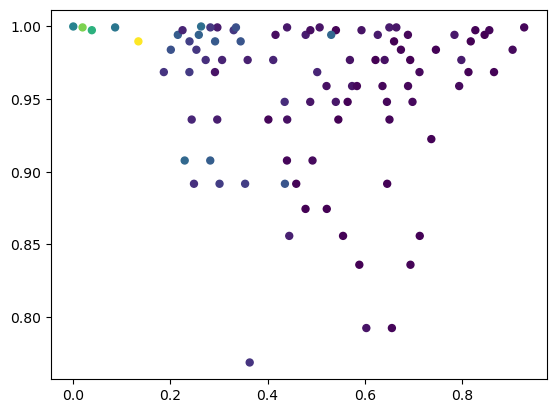

In [5]:


# 2) Embed all variants (full grid)
orderings, Qs = asra_orderings_multiblock(X, y, levels_per_pos=[20,20], sigma=sigma, w=1.0, tau=2.0, mode="robust")
X_all = all_genotypes([20,20])

block_weights = compute_block_weights_from_Q(Qs)
x_embed, y_embed = rank_corner_coords(X, orderings=orderings, levels_per_pos=[20,20], block_weights=block_weights)

plt.scatter(x_embed, y_embed, c=y, cmap='viridis', s=25)


In [6]:
plot_q_values(Qs)

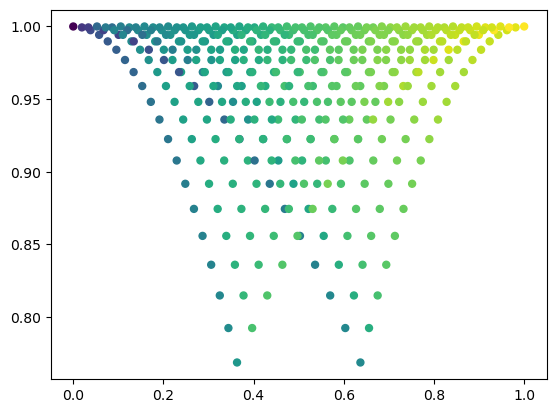

In [13]:
scores = build_additive_model(Qs)
x_embed, y_embed = rank_corner_coords(X_all, orderings=orderings, levels_per_pos=[20,20], block_weights=block_weights)
y_pred = np.array([additive_predict(scores, x) for x in X_all])

plt.scatter(x=x_embed, y=y_embed, c=y_pred, cmap='viridis', s=25)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt






plot_state_rankings(Qs, orderings, outfile="asra_orderings.png")

### Test on more dimensions **Unfinished**

In [ ]:
# test on simulated data with more than two mutation sites
X_sim = np.random.randint(5, size=(500, 4))
X_sim = np.unique(X_sim, axis=0)

y_sim = np.random.uniform(low=0.5, high=13.3, size=(X_sim.shape[0],))

ordering, _ = asra_ordering(X_sim, y_sim, levels=5)

np.stack([np.asarray(aa)[ordering[:,0]], 
          np.asarray(aa)[ordering[:,1]],
          np.asarray(aa)[ordering[:,2]],
          np.asarray(aa)[ordering[:,3]]], axis=1)
X_sim.shape

In [ ]:
y_sim